In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import sklearn
import datetime
import array 
import math

import shapefile as sf
from matplotlib.patches import Polygon
import mpld3

from pyproj import Proj
from censusgeocode import CensusGeocode
from matplotlib.collections import PatchCollection

In [16]:
import smopy

In [3]:
mc_reader = sf.Reader('shapefiles/Municipal_Boundaries/MUNICIPAL_BOUNDARIES.shp')
mc_records = pd.DataFrame(mc_reader.records())
mc_shapes = mc_reader.shapes()

mc_records_index = np.where(mc_records[1]=='SD')

In [4]:
reader2 = sf.Reader('shapefiles/sandiego_city_blockgroups.shp')
bg_info2 = pd.DataFrame(reader2.records())
shapes2 = reader2.shapes()

bg_info2.rename(columns={2: 'tract', 3: 'blockgroup', 8: 'land_area'}, inplace=True)
bg_info2['tract'] = bg_info2['tract'].astype(float)
bg_info2['blockgroup'] = bg_info2['blockgroup'].astype(float)

(50, 450)

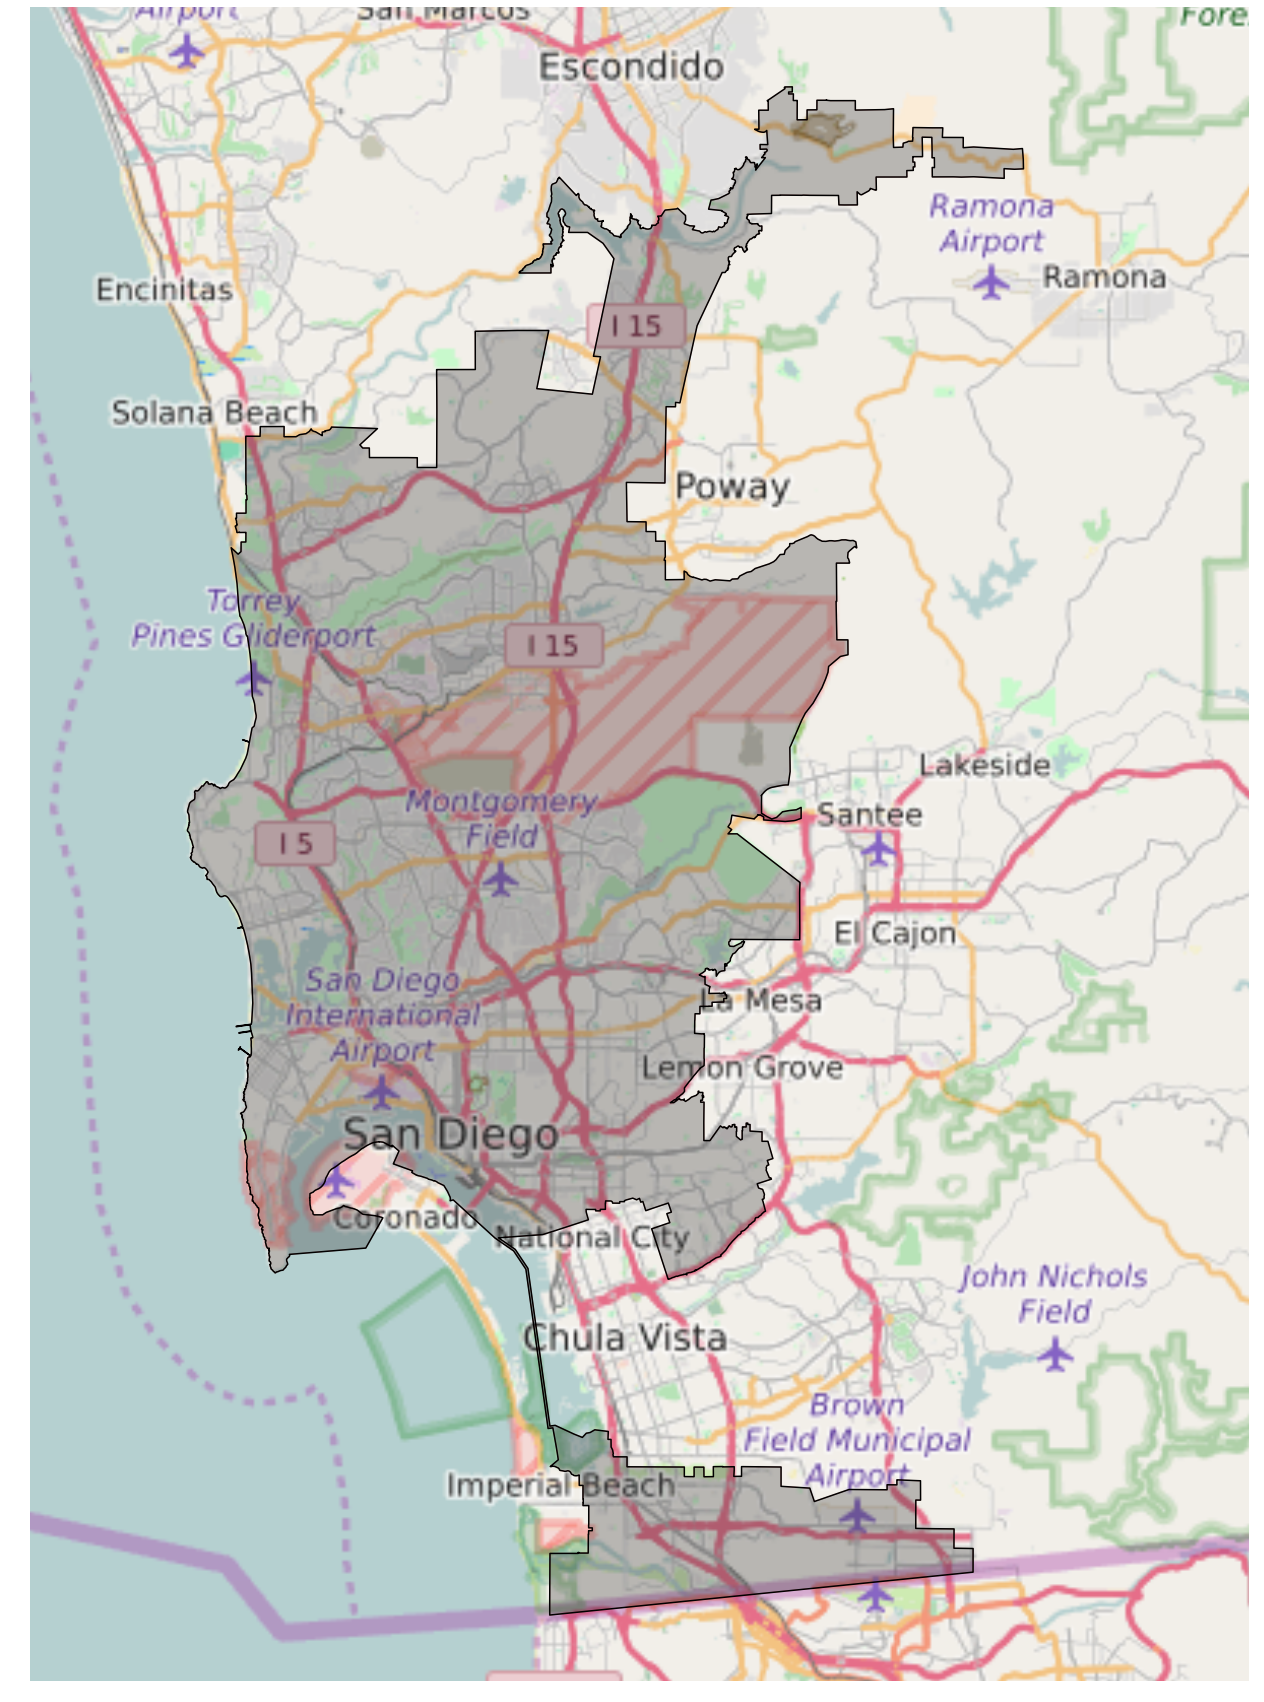

In [5]:
#smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512

fig,test = plt.subplots(1,1, figsize=(30,30))
p1 = Proj("+init=EPSG:2230", preserve_units=True)

patches1 = []
i=32 
temp = pd.DataFrame(mc_shapes[i].points)
lon, lat = p1(np.array(temp.loc[0:33632, 0]), np.array(temp.loc[0:33632, 1]), inverse=True)

map = smopy.Map((32.533541, -117.285629, 33.116178, -116.9), z=10)

x, y = map.to_pixels(lat, lon)    

barf = pd.DataFrame()
barf['x'] = x
barf['y'] = y

map.show_mpl(ax=test);
# Plot the itinerary.
plt.plot(x,y, 'k-', lw=1.5)
poly = plt.Polygon(barf[['x', 'y']], fc='0.2', ec='r', alpha=0.3, lw=1.0)
plt.gca().add_patch(poly)


plt.axis('off')
plt.ylim(800,250)
plt.xlim(50,450)
#plt.savefig('output_figures/mapping_color.png', bbox_inches='tight')

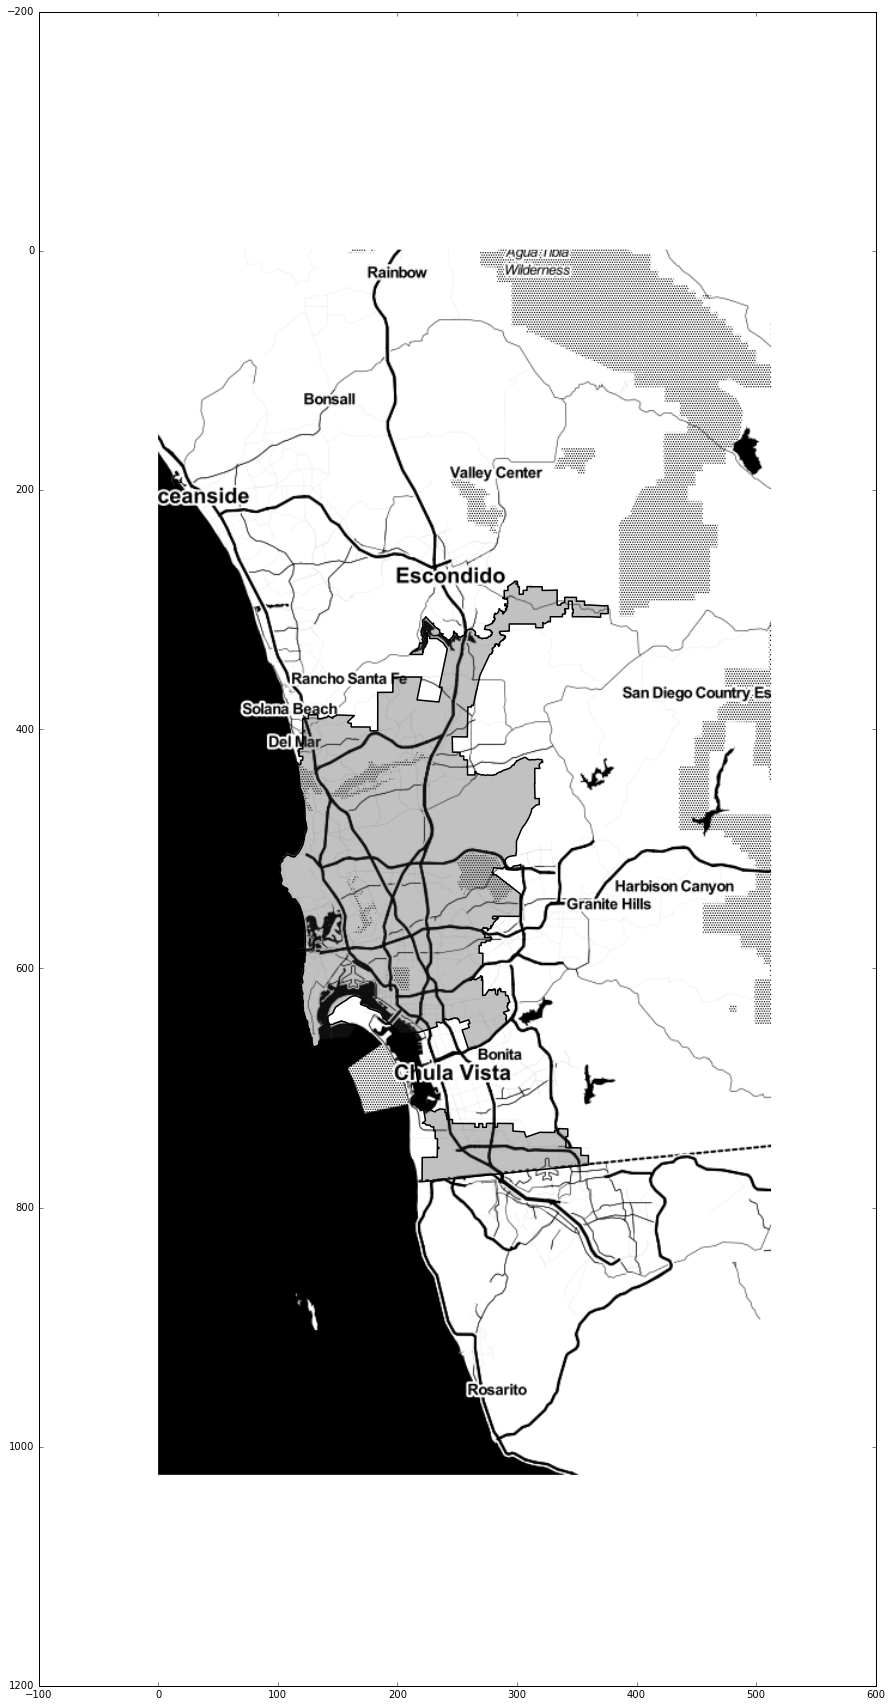

In [51]:
#smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512

smopy.TILE_SERVER = "http://tile.stamen.com/toner/{z}/{x}/{y}.png"
#smopy.TILE_SERVER = "https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png"
smopy.TILE_SIZE = 256
#smopy.MAXTILES = 16

fig,test = plt.subplots(1,1, figsize=(30,30))
p1 = Proj("+init=EPSG:2230", preserve_units=True)

patches1 = []
i=32 
temp = pd.DataFrame(mc_shapes[i].points)
lon, lat = p1(np.array(temp.loc[0:33632, 0]), np.array(temp.loc[0:33632, 1]), inverse=True)

map = smopy.Map((32.533541, -117.285629, 33.116178, -116.9), z=10)

x, y = map.to_pixels(lat, lon)    

barf = pd.DataFrame()
barf['x'] = x
barf['y'] = y

map.show_mpl(ax=test);
# Plot the itinerary.
plt.plot(x,y, 'k-', lw=1.5)
poly = plt.Polygon(barf[['x', 'y']], fc='0.2', ec='r', alpha=0.3, lw=1.0)
plt.gca().add_patch(poly)


#plt.axis('off')
#plt.ylim(1600,500)
#plt.xlim(150,800)
#plt.savefig('output_figures/mapping_bw_nolabels.png', bbox_inches='tight')


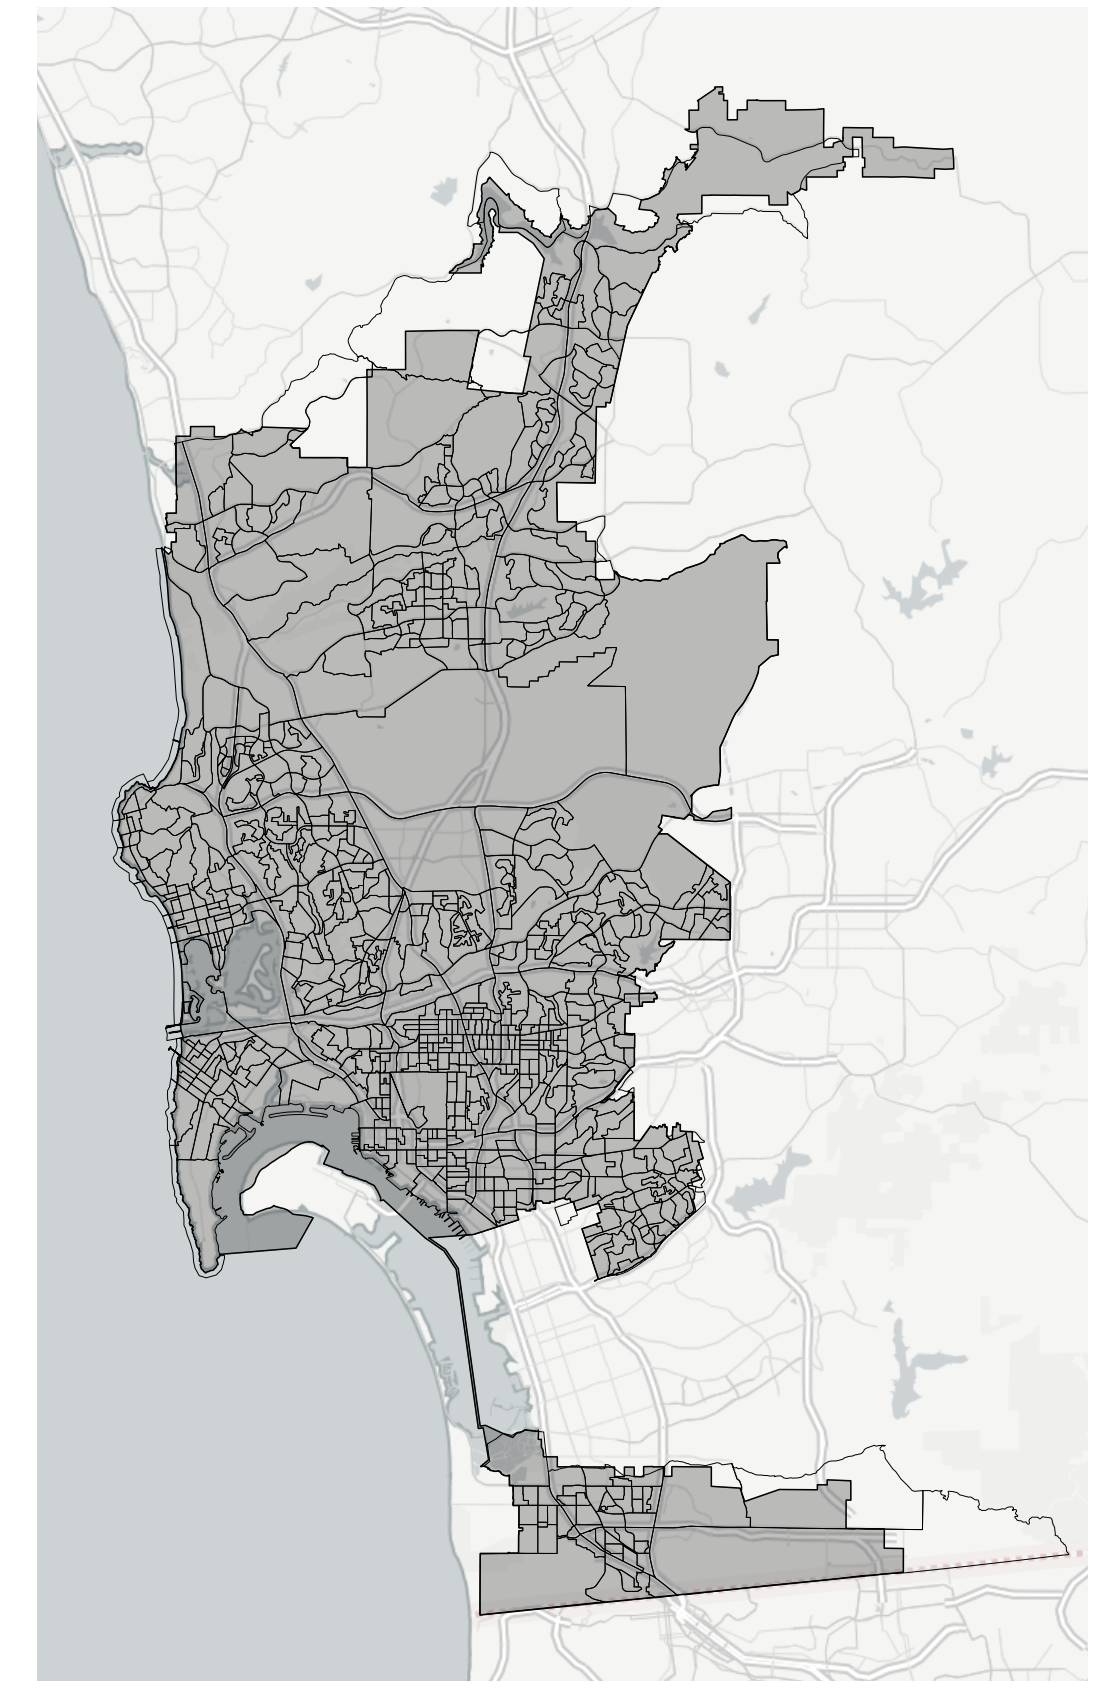

In [71]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}@2x.png"
smopy.TILE_SIZE = 512

#smopy.TILE_SERVER = "http://tile.stamen.com/toner/{z}/{x}/{y}.png"
#smopy.TILE_SERVER = "https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png"

#smopy.TILE_SERVER = "http://b.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png"
#smopy.TILE_SIZE = 256
#smopy.MAXTILES = 16

fig,test = plt.subplots(1,1, figsize=(30,30))
p1 = Proj("+init=EPSG:2230", preserve_units=True)

patches1 = []
i=32 
temp = pd.DataFrame(mc_shapes[i].points)
lon, lat = p1(np.array(temp.loc[0:33632, 0]), np.array(temp.loc[0:33632, 1]), inverse=True)

map = smopy.Map((32.533541, -117.285629, 33.116178, -116.9), z=10)

x, y = map.to_pixels(lat, lon)    

barf = pd.DataFrame()
barf['x'] = x
barf['y'] = y

map.show_mpl(ax=test);
# Plot the itinerary.
plt.plot(x,y, 'k-', lw=1.5)
poly = plt.Polygon(barf[['x', 'y']], fc='0.2', ec='k', alpha=0.3, lw=1.0)
plt.gca().add_patch(poly)

# plot the individual block groups
patches = []
for i in range(0,len(bg_info2)): 
    barf = pd.DataFrame(shapes2[i].points)
    x2, y2 = map.to_pixels(barf[1], barf[0])
    barf['x2'] = x2
    barf['y2'] = y2

    poly = plt.Polygon(barf[['x2', 'y2']], fc='none', ec='k', alpha=1.0, lw=1.0)
    patches.append(poly)
    plt.gca().add_patch(poly)

plt.axis('off')
#plt.ylim(800,220)
#plt.xlim(75,410)
plt.ylim(1600,500)
plt.xlim(150,840)

plt.savefig('output_figures/mapping_bw_bg_nolabels.png', bbox_inches='tight')



In [15]:
barf = pd.DataFrame(shapes2[i].points)
x2, y2 = map.to_pixels(barf[1], barf[0])
barf['x2'] = x2
barf['y2'] = y2

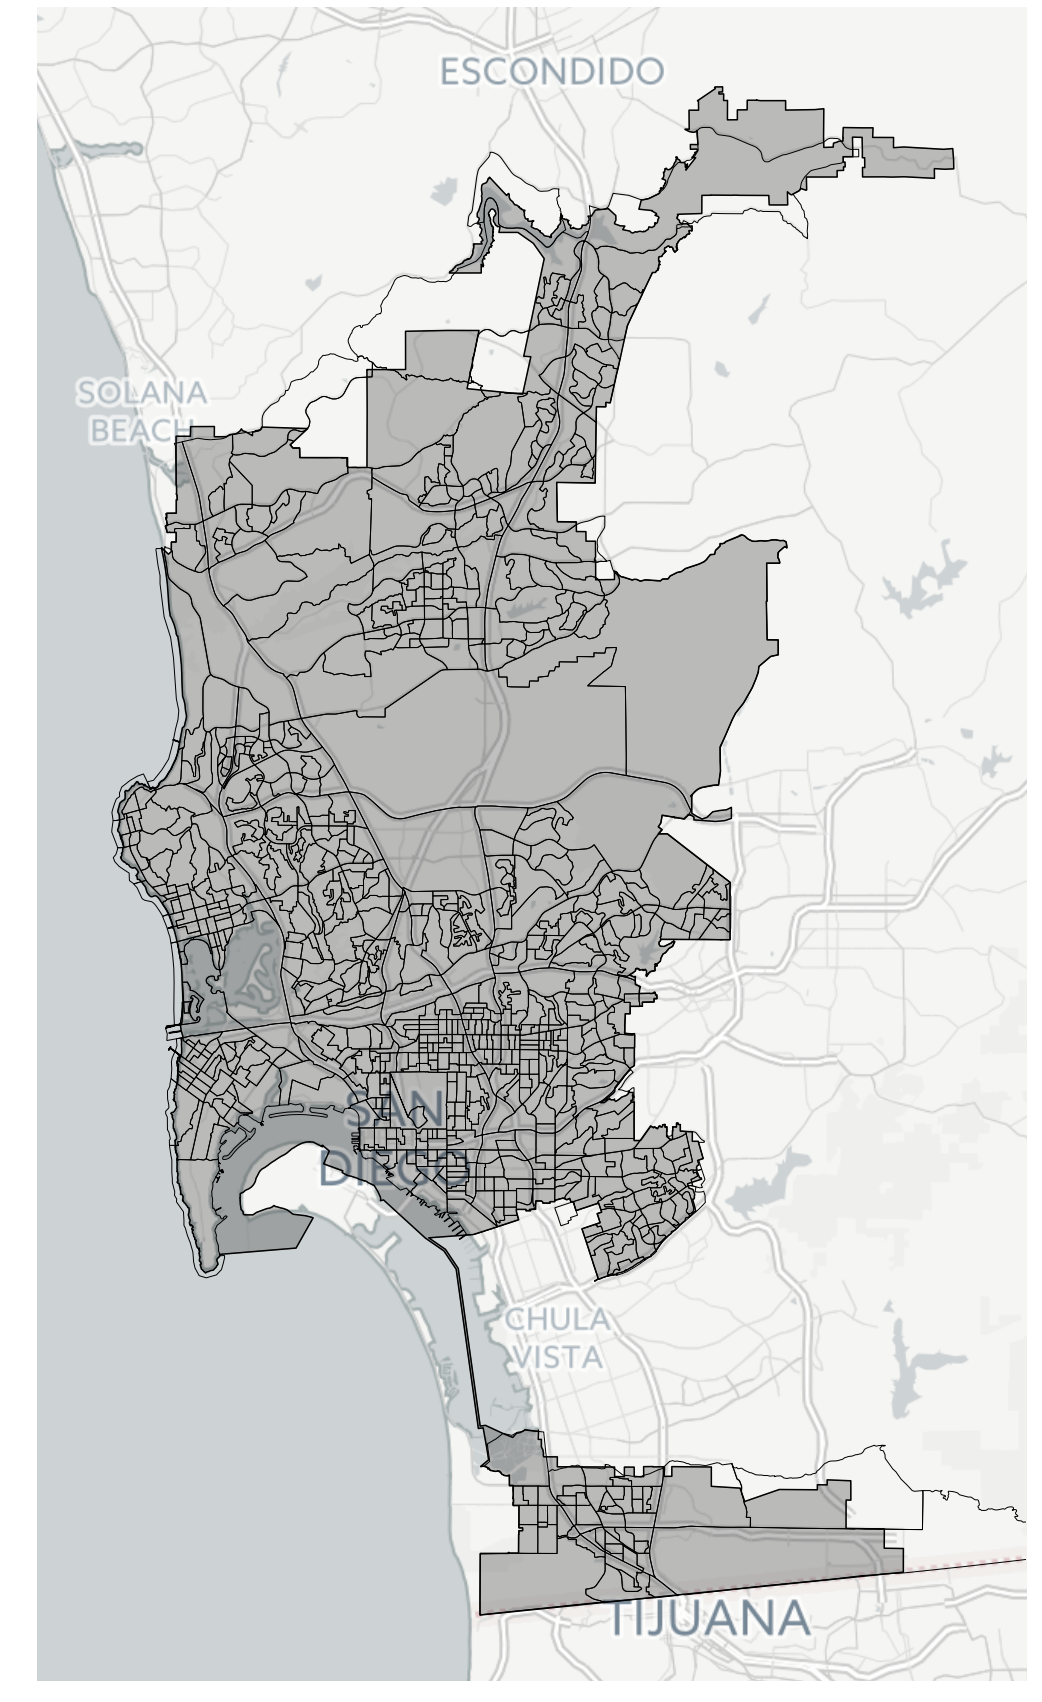

In [20]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
smopy.TILE_SIZE = 512

fig,test = plt.subplots(1,1, figsize=(30,30))
p1 = Proj("+init=EPSG:2230", preserve_units=True)

patches1 = []
i=32 
temp = pd.DataFrame(mc_shapes[i].points)
lon, lat = p1(np.array(temp.loc[0:33632, 0]), np.array(temp.loc[0:33632, 1]), inverse=True)

map = smopy.Map((32.533541, -117.285629, 33.116178, -116.9), z=10)

x, y = map.to_pixels(lat, lon)    

barf = pd.DataFrame()
barf['x'] = x
barf['y'] = y

map.show_mpl(ax=test);
# Plot the Municipal area
plt.plot(x,y, 'k-', lw=1.5)
poly = plt.Polygon(barf[['x', 'y']], fc='0.2', ec='k', alpha=0.3, lw=1.0)
plt.gca().add_patch(poly)


# plot the individual block groups
patches = []
for i in range(0,len(bg_info2)): 
    barf = pd.DataFrame(shapes2[i].points)
    x2, y2 = map.to_pixels(barf[1], barf[0])
    barf['x2'] = x2
    barf['y2'] = y2

    poly = plt.Polygon(barf[['x2', 'y2']], fc='none', ec='k', alpha=1.0, lw=1.0)
    patches.append(poly)
    plt.gca().add_patch(poly)



plt.axis('off')
plt.ylim(1600,500)
plt.xlim(150,800)
#plt.savefig('output_figures/mapping_bw_blockgroups.png', bbox_inches='tight')

